# Redes Neuronales (pure Pyhton)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

## Una Red Neuronal Simple (sin capas ocultas)

Una red neuronal con $N_0$ neuronas de entrada y $N_1$ neuronas de salida (sin capas ocultas)
$$ y_j^{\text{out}}=f\left(\sum_{k}w_{jk}y_k^{\text{in}}+b_j\right)$$
donde $w$ es la matriz de prdod, $b$ es el vector bias, y $f$ es una funcion de activacion.

In [2]:
N0 = 3  # tamano de la capa de entrada
N1 = 2  # tamano de la capa de salida

# Inicializamos peso aleatorios: un array N0 x N1
w = np.random.uniform(low = -1, high = +1, size=(N0, N1))

# Inicializamos biases alaetorios: vector N1
b = np.random.uniform(low = -1, high = +1, size = N1)

In [10]:
# Valores de entrada
y_in= np.array([0.1 , 0.5, -0.2])

In [15]:
# evaluamos la red neuronal a mano, en dos pasos
z = np.dot(y_in, w) + b # resultado: el vector de valores 'z', de lpongitud N1
y_out = 1/(1+np.exp(-z)) # la funcion sigmoide (aplicada a cada elemento)

In [16]:
print("entrada de la red neuronal y_in:", y_in)
print("pesos w:", w)
print("vector bias b:", b)
print("superposicion lineal z:", z)
print("salida de la red neuronal y_out:", y_out)

entrada de la red neuronal y_in: [ 0.1  0.5 -0.2]
pesos w: [[-0.22558775 -0.02249746]
 [-0.53728058  0.53608252]
 [-0.6770265  -0.81065247]]
vector bias b: [0.39496003 0.81359627]
superposicion lineal z: [0.23916626 1.24151828]
salida de la red neuronal y_out: [0.55950818 0.77582818]


## Veamos el resultado de la Red Neuronal

Definamos una funcion que evalua la red y muestra la salida para varias entradas:

In [33]:
# funcion que alpica la red neuronal
def apply_simple_net(y_in):
    global w, b
    z = np.dot(y_in, w) + b  
    return (1/(1 + np.exp(-z)))

In [34]:
N0 = 2 # tamano de la capa de entrada
N1 = 1 # tamano de la capa de salida

w = np.random.uniform(low = -10, high = +10, size = (N0, N1)) # pesos aleatorios: N1 x N0
b = np.random.uniform(low = -1, high = +1, size = N1) # biases: vector N1

In [35]:
apply_simple_net([0.5, 0.2]) # una prueba simple

array([0.36684508])

Este es un metodo simple apra ahcerlo, sin embargo no es eficiente. Despues haremos uso de una sintaxis de arrays eficiente.

In [36]:
M = 50 # tamano de l aimagen M x M
y_out = np.zeros([M,M]) # array M x M, para guardar el resultado

In [38]:
for j1 in range(M):
    for j2 in range(M):
        # out of these integer indices, generate
        # two values in the range -0.5...0.5
        # and then apply the network to those two
        # input values
        value0 = float(j1) / M - 0.5
        value1 = float(j2) / M - 0.5
        y_out[j1,j2] = apply_simple_net([value0,value1])[0]

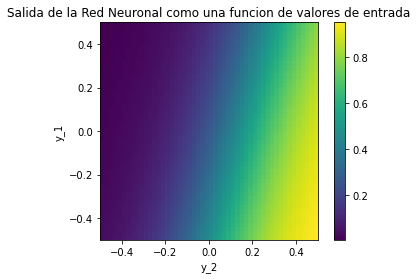

In [39]:
# Mostramos la imagen
plt.imshow(y_out, origin = 'lower', extent = (-0.5, 0.5, -0.5, 0.5))
plt.colorbar()
plt.title("Salida de la Red Neuronal como una funcion de valores de entrada")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

## Red Neuronal con  una capa oculta

La idea aquí es tener múltiples matrices de peso (para cada par de capas subsiguientes hay una matriz de peso). La función que "aplica una capa", es decir, va de una capa a la siguiente, es esencialmente la misma que la función que evalúa la red simple anterior.

In [41]:
# una funcion que evalua una capa basada en los valores de una neurona en la capa anterior
def apply_layer(y_in,w,b): 
    z = np.dot(w,y_in) + b
    return(1/(1 + np.exp(-z)))

In [42]:

N0 = 2 # tamano de la capa de entrada
N1 = 30 # tamano de la capa oculta
N2 = 1 # tamano de la capa de salida

In [43]:
# pesos y biases de la cada de entrada a la capa oculta
w1 = np.random.uniform(low = -10, high = +10, size = (N1, N0)) # pesos aleatorios: N1 x N0
b1 = np.random.uniform(low = -1, high = +1, size = N1) # biases: vector N1



In [45]:
# pesos y biases de la capa oculta a la capa de salida
w2 = np.random.uniform(low = -10, high = +10, size = (N2, N1)) # pesos aleatoreos
b2 = np.random.uniform(low = -1, high = +1, size = N2) # biases

In [46]:
# Evalua la red neuronal por subsecuencia
# evaluacion en dos pasos (entrada a oculta y oculta a salida)
def apply_net(y_in):
    global w1,b1,w2,b2
    
    y1=apply_layer(y_in,w1,b1)
    y2=apply_layer(y1,w2,b2)
    return(y2)

Esta no es la manera mas eficiente, pero funciona y es simple.

In [48]:
# Obtenemos los valores para los rangos de las entradas
M = 50 # crea una imgaden de tamano M x M
y_out = np.zeros([M, M]) # array M x M, para gaurdar los resultados

In [49]:
for j1 in range(M):
    for j2 in range(M):
        value0=float(j1) / M - 0.5
        value1=float(j2) / M - 0.5
        y_out[j1, j2] = apply_net([value0, value1])[0]

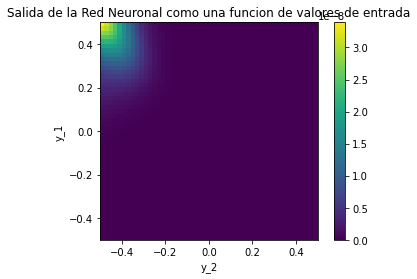

In [50]:
# mostramos la imagen
plt.imshow(y_out, origin = 'lower', extent = (-0.5, 0.5, -0.5, 0.5))
plt.colorbar()
plt.title("Salida de la Red Neuronal como una funcion de valores de entrada")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

La forma de la salida ya es más 'compleja' que la de una red simple sin capa oculta.

Vayamos más allá en esa dirección...

## Aplicar una red a un 'batch' de muestras (trucos de Python)

La idea es aplicar la red neuronal a muchas muestras en paralelo (no lazos for).

### Pequeno experimento: multiplicación de vector-matriz

In [52]:
# Veamos que hace el producto dot: 
W = np.zeros([7, 8])
y = np.zeros([8, 30]) 
# here '30' would stand for the number of samples
# in our envisaged network applications
np.shape(np.dot(W, y))

(7, 30)

In [54]:
# ahora tratemos de anadir al vector bias,
B = np.zeros(7)
result = np.dot(W, y) + B # Producira un error

ValueError: operands could not be broadcast together with shapes (7,30) (7,) 

In [55]:
# Reordenando lso indices hace que funcione
y = np.zeros([30, 8])
W = np.zeros([8, 7])
np.shape(np.dot(y, W))

(30, 7)

In [56]:
# y ahora tratemos de nuevo anadir el vector bias,
B = np.zeros(7)
result = np.dot(y, W) + B 
np.shape(result)

(30, 7)

### Definamos funciones que evaluen la capa y evalue la red neuronal, con proceso de lotes

Configuraion para procesamiento por lotes, es decir, evaluación paralela de muchas muestras de entrada.

In [57]:
# una funcion que aplica una capa
def apply_layer_new(y_in,w,b):
    z = np.dot(y_in, w) + b # notemos el orden diferente en la matriz producto
    return(1/(1 + np.exp(-z)))

In [58]:
# como la anterior, pero con una nueva capa
def apply_net_new(y_in):
    global w1,b1,w2,b2
    
    y1 = apply_layer_new(y_in, w1, b1)
    y2 = apply_layer_new(y1, w2, b2)
    return(y2)

In [59]:
N0 = 2 # tamano de la cada de entrada
N1 = 5 # tamano de la cada oculta
N2 = 1 #  tamano de la cada de salida

In [60]:
# de la capa de entrada a la capa oculta
w1 = np.random.uniform(low = -10, high = +10, size = (N0, N1)) # nueva ordn N0 x N1
b1 = np.random.uniform(low = -1, high = +1, size = N1) # biases: N1 vector

In [61]:
# de la capa oculta a la capa de salida
w2 = np.random.uniform(low = -10, high = +10, size = (N1, N2)) # nueva orden N1 x N2
b2 = np.random.uniform(low = -1, high = +1, size = N2) # biases

In [62]:
batchsize = 10000
y = np.random.uniform(low = -1, high = 1, size = (batchsize, 2))

In [63]:
y_out=apply_net_new(y)

In [64]:
np.shape(y_out) 
# estas son 10000 muestras evalaudas en paralelo

(10000, 1)